# Определение перспективного тарифа для телеком-компании

У федерального оператора сотовой связи два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Изучим данные, переданные нам для работы и загрузим необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
pd.options.display.float_format = '{:.2f}'.format

Считаем файлы и сохраним их в соответствующих датасетах

In [3]:
try:
    calls_df = pd.read_csv('/datasets/calls.csv')
except:
    calls_df = pd.read_csv('/Users/romanvasyliev/Downloads/calls.csv')

try:
    inet_df = pd.read_csv('/datasets/internet.csv')
except:
    inet_df = pd.read_csv('/Users/romanvasyliev/Downloads/internet.csv')
    
try:
    sms_df = pd.read_csv('/datasets/messages.csv')
except:
    sms_df = pd.read_csv('/Users/romanvasyliev/Downloads/messages.csv')
    
try:
    tarif_df = pd.read_csv('/datasets/tariffs.csv')
except:
    tarif_df = pd.read_csv('/Users/romanvasyliev/Downloads/tariffs.csv')
    
try:
    users_df = pd.read_csv('/datasets/users.csv')
except:
    users_df = pd.read_csv('/Users/romanvasyliev/Downloads/users.csv')
    

## Проверка данных

Проверим информацию по каждому датасету, посмотрим какие значения содержатся, типы данных и наименования столбцов

In [4]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах (по условиям задания 0 - это пропущенный звонок)
* user_id — идентификатор пользователя, сделавшего звонок

Столбцы id и call_date необходимо изменить тип данных

In [5]:
calls_df.describe()

,duration,user_id
count,202607.00,202607.00
mean,6.76,1253.94
std,5.84,144.72
min,0.00,1000.00
25%,1.30,1126.00
50%,6.00,1260.00
75%,10.70,1379.00
max,38.00,1499.00


Видим что есть нулевые значения - это пропущенные звонки, максимальная продолжительность разговора составляла 38 минут

In [6]:
calls_df.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

Все данные заполнены - пропусков нет

In [7]:
calls_df.duplicated().sum()

0

Дубликатов нет. 
Повторим тоже самое для остальных датасетов

In [8]:
inet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя
* Unnamed: 0 - неизвестный столбец

Видим необходимость изменить тип данных столбцов id, session_date

In [9]:
inet_df.isna().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

Пропуски отсутствуют

In [10]:
inet_df.describe()

,Unnamed: 0,mb_used,user_id
count,149396.00,149396.00,149396.00
mean,74697.50,370.19,1252.10
std,43127.05,278.30,144.05
min,0.00,0.00,1000.00
25%,37348.75,138.19,1130.00
50%,74697.50,348.01,1251.00
75%,112046.25,559.55,1380.00
max,149395.00,1724.83,1499.00


In [11]:
inet_df.duplicated().sum()

0

Дубликатов нет и пропусков нет, отлично. Повторим анализ для таблицы с сообщениями

In [12]:
sms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

Необходио сменить типы данных для столбцов id,  message_date

In [13]:
sms_df.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [14]:
inet_df.duplicated().sum()

0

Дубликатов нет и пропусков нет, проверим датасет с тарифами

In [15]:
tarif_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)


In [16]:
tarif_df.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Всего 2 строки с данными по тарифам, типы столбцов корректные - ничего менять не будем. Проверим таблицу пользователей

In [17]:
users_df.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Видим пропуски в 'churn_date', по условию - если стоит пропуск - то тариф еще действовал на момент выгрузки данных

In [18]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана


Видим столбец reg_date имеет тип данных object, необходимо его будет сменить на date

In [19]:
users_df.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

Видим пропуски в 'churn_date', из 500 пользователей 462 использовали текущий тариф на момент выгрузки.

<AxesSubplot:>

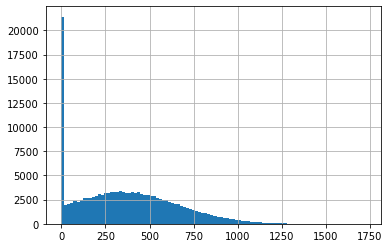

In [20]:
inet_df['mb_used'].hist(bins=100)

Как видим - количество пользователей, которые не пользуются интернетом или пользуются совсем мало достаточно много.

In [21]:
id_sms = sms_df['user_id'].unique()
id_calls = calls_df['user_id'].unique()
id_inet = inet_df['user_id'].unique()
id_users = users_df['user_id'].unique()

In [22]:
counter_sms=0
counter_inet=0
counter_calls=0
for index in id_users:
    if index in id_sms:
        counter_sms +=1
    if index in id_inet:
        counter_inet +=1
    if index in id_calls:
        counter_calls +=1
    
print ('уникальных пользователей в базе смс',counter_sms, '       Отсутствуют ', len(users_df) - counter_sms )
print ('уникальных пользователей в базе звонков',counter_calls, '   Отсутствуют ', len(users_df) - counter_calls  )
print ('уникальных пользователей в базе интернет',counter_inet, '  Отсутствуют ', len(users_df) - counter_inet  )

уникальных пользователей в базе смс 426        Отсутствуют  74
уникальных пользователей в базе звонков 492    Отсутствуют  8
уникальных пользователей в базе интернет 497   Отсутствуют  3


## Предобработка данных

Изменим типы данных в таблице calls_df

In [23]:
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format = '%Y-%m-%d')
calls_df['id'] = calls_df['id'].astype('int')

Поменяем типы данных в таблице inet_df

In [24]:
inet_df['id'] = inet_df['id'].astype('int')
inet_df['session_date'] = pd.to_datetime(inet_df['session_date'], format = '%Y-%m-%d')

Поменяем типы данных в таблице sms_df

In [25]:
sms_df['id'] = sms_df['id'].astype('int')
sms_df['message_date'] = pd.to_datetime(sms_df['message_date'], format = '%Y-%m-%d')

Поменяем типы данных в таблице users_df

In [26]:
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], format = '%Y-%m-%d')

## Расчёты и добавление результатов в таблицу

Добавим столбец sum_call в котором будут округленные в большую сторону значения из столбца 'duration', потому что так считает оператор выручку. В столбец month добавим значения месяца совершения звонка.

In [27]:
calls_df['sum_call'] = np.ceil(calls_df['duration'])

In [28]:
calls_df['month'] = pd.DatetimeIndex(calls_df['call_date']).month

Добавим столбец 'month' в таблицу inet_df

In [29]:
inet_df['month'] = pd.DatetimeIndex(inet_df['session_date']).month

В таблице sms_df также создадим столбец 'month'


In [30]:
sms_df['month'] = pd.DatetimeIndex(sms_df['message_date']).month

Добавим идентификатор тарифа 'tariff_id' в таблицу users_df, 0 - smart, 1 - ultra, для этого напишем функцию и применим ее к каждой строке датасета users_df

In [31]:
def set_id_tarif(tariff):
    if tariff == 'ultra':
        return 1
    elif tariff == 'smart':
        return 0

In [32]:
users_df['tariff_id'] = users_df['tariff'].apply(set_id_tarif)

In [33]:
users_df

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,tariff_id
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,0
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,0
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,1
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,1
...,...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra,1
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart,0
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart,0
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,0


### объединение таблиц 

Объединим таблицы users_df и calls_df, они объединятся по user_id. Затем мы создадим сводную таблицу, которая сгруппирует данные по пользователям и месяцам звонков с помощью функций посчитаем количество звонков по месяцам и их продолжительность. Так же переименуем столбцы в 'sum_call' и 'count_call'.

In [34]:
calls_users = users_df.merge(calls_df)
call_pivot= calls_users.pivot_table(index=['user_id','month'], values='sum_call',aggfunc=['sum','count'])
call_pivot.columns = ['sum_call','count_call']

In [35]:
call_pivot

sum_call  count_call
user_id month                      
1000    5        159.00          22
        6        172.00          43
        7        340.00          47
        8        408.00          52
        9        466.00          58
...                 ...         ...
1498    10       247.00          41
1499    9         70.00           9
        10       449.00          68
        11       612.00          74
        12       492.00          69

[3174 rows x 2 columns]

Объединим таблицы пользователей и таблицу с данными по интернет соединениям. Затем мы создадим сводную таблицу, которая сгруппирует данные по пользователям и интернет соединениям, с помощью функции посчитаем сумму трафика за месяц по каждому полльзователю.

In [36]:
inet_users = users_df.merge(inet_df)
inet_pivot= inet_users.pivot_table(index=['user_id','month'], values='mb_used',aggfunc='sum')
inet_pivot

mb_used
user_id month         
1000    5      2253.49
        6     23233.77
        7     14003.64
        8     14055.93
        9     14568.91
...                ...
1498    10    20579.36
1499    9      1845.75
        10    17788.51
        11    17963.31
        12    13055.58

[3203 rows x 1 columns]

Объединим таблицы пользователей и таблицу с данными отправленых сообщений смс. Затем мы создадим сводную таблицу, которая сгруппирует данные по пользователям и интернет соединениям, с помощью функции посчитаем количество сообщений, отправленных пользователем за месяц.

In [37]:
users_sms = users_df.merge(sms_df)
sms_pivot = users_sms.pivot_table(index = ['user_id','month'] ,values = 'id',aggfunc= 'count')
sms_pivot.columns = ['sms_count']
sms_pivot

sms_count
user_id month           
1000    5             22
        6             60
        7             75
        8             81
        9             57
...                  ...
1498    10            42
1499    9             11
        10            48
        11            59
        12            66

[2717 rows x 1 columns]

## Создание одного датасета со всеми данными по сводным таблицам

In [38]:
full_table = []


Для корректного объединения сводных таблиц в одну необходимо сбросить их индексы 

In [39]:
inet = inet_pivot.reset_index()
sms = sms_pivot.reset_index()
call = call_pivot.reset_index()

Теперь начнем объединять датасеты поочереди методом 'outer', чтобы никакие данные не пропали.
Объединим таблицы со звонками и данными интернет соединений и добавим их в full_table 

In [40]:
full_table = call.merge(inet, how = 'outer')

Объединим таблицу с данными смс сообщений

In [41]:
full_table = full_table.merge(sms, how = 'outer')

Добавим в нашу таблицу информацию о пользователях, объединив  full_table с users_df

In [42]:
full_table = full_table.merge(users_df,how = 'outer')
full_table.head(10)

,user_id,month,sum_call,count_call,mb_used,sms_count,age,churn_date,city,first_name,last_name,reg_date,tariff,tariff_id
0,1000,5.00,159.00,22.00,2253.49,22.00,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1
1,1000,6.00,172.00,43.00,23233.77,60.00,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1
2,1000,7.00,340.00,47.00,14003.64,75.00,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1
3,1000,8.00,408.00,52.00,14055.93,81.00,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1
4,1000,9.00,466.00,58.00,14568.91,57.00,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1
5,1000,10.00,350.00,57.00,14702.49,73.00,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1
6,1000,11.00,338.00,43.00,14756.47,58.00,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1
7,1000,12.00,333.00,46.00,9817.61,70.00,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1
8,1001,11.00,430.00,59.00,18429.34,NaN,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,0
9,1001,12.00,414.00,63.00,14036.66,NaN,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,0


У нас получилась таблица с основными данными для анализа - но в ней есть еще пропуски - потому что какие-то пользователи например не отправляли сообщения в каком то месяце. Заполним эти значения нулями

In [43]:
full_table.isna().sum()

user_id          0
month            2
sum_call        42
count_call      42
mb_used         13
sms_count      499
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
tariff_id        0
dtype: int64

Видим что в значении месяца есть пара пустых значений - посмотрим что это за пользователи.

In [44]:
full_table[full_table['month'].isna()]

,user_id,month,sum_call,count_call,mb_used,sms_count,age,churn_date,city,first_name,last_name,reg_date,tariff,tariff_id
3214,1128,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,1
3215,1371,NaN,NaN,NaN,NaN,NaN,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,0


Видим пару пользователей с отсутствующими значениями по всем основным показателям - звонкам, сообщениям, трафику. Удалим данных пользователей из датасета так как они не несут никакой информации.

In [45]:
full_table = full_table.dropna(subset=['month'])

In [46]:
full_table.isna().sum()

user_id          0
month            0
sum_call        40
count_call      40
mb_used         11
sms_count      497
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
tariff_id        0
dtype: int64

Теперь можно заполнить пустые значения нулями 

In [47]:
full_table = full_table.fillna(0)

Далее для более удобного исследовательского анализа мы добавим в общую таблицу данные по тарифу каждого пользователя - объединим ее с таблицей tarif_df по столбцу tariff_id

In [48]:
full_table = full_table.merge (tarif_df, left_on = 'tariff_id', right_index = True)

In [49]:
full_table.head()

,user_id,month,sum_call,count_call,mb_used,sms_count,age,churn_date,city,first_name,...,tariff,tariff_id,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5.00,159.00,22.00,2253.49,22.00,52,0,Краснодар,Рафаил,...,ultra,1,1000,30720,3000,1950,150,1,1,ultra
1,1000,6.00,172.00,43.00,23233.77,60.00,52,0,Краснодар,Рафаил,...,ultra,1,1000,30720,3000,1950,150,1,1,ultra
2,1000,7.00,340.00,47.00,14003.64,75.00,52,0,Краснодар,Рафаил,...,ultra,1,1000,30720,3000,1950,150,1,1,ultra
3,1000,8.00,408.00,52.00,14055.93,81.00,52,0,Краснодар,Рафаил,...,ultra,1,1000,30720,3000,1950,150,1,1,ultra
4,1000,9.00,466.00,58.00,14568.91,57.00,52,0,Краснодар,Рафаил,...,ultra,1,1000,30720,3000,1950,150,1,1,ultra


Добавим в датасет 3 столбца - в каждом отразим разницу между количеством мунут/сообщений/мегабайт пользователя и лимитом тарифа, умноженные на ставку соответсвующего тарифа. Отрицательные значения нам ничего не дадут - это значит пользователь не израсходовал свои лимиты по тарифу по соответствующей услуге и мы их обнулим. А положительные значения показывают сумму, которую пользователь заплатит сверх абонентской платы.

In [50]:
full_table['calls_revenue'] = (full_table['sum_call'] - full_table['minutes_included']) * full_table['rub_per_minute']
full_table['sms_revenue'] = (full_table['sms_count'] - full_table['messages_included']) * full_table['rub_per_message']
full_table['calls_revenue'] = full_table['calls_revenue'].clip(lower = 0)
full_table['sms_revenue'] = full_table['sms_revenue'].clip(lower = 0)

In [51]:
full_table['inet_revenue'] = (np.ceil((full_table['mb_used'] - full_table['mb_per_month_included']) / 1024) )* full_table['rub_per_gb']
full_table['inet_revenue'] = full_table['inet_revenue'].clip(lower = 0)


добавим столбец с потребленным трафиком в Гб и столбец с количеством Гб - превышающих лимит


In [52]:
full_table['used_gb'] = np.ceil(full_table['mb_used'] / 1024)
full_table['gb_excess'] = (np.ceil((full_table['mb_used'] - full_table['mb_per_month_included']) / 1024))
full_table['gb_excess'] = full_table['gb_excess'].clip(lower = 0)

### Определение выручки компании

Добавим столбец, сумму значений за услуги, превышающие лимиты и саму стоимость абонентской платы - это и будет выручка компании за месяц по данному пользователю.

In [53]:
full_table['total_revenue'] = full_table['calls_revenue'] +full_table['sms_revenue'] +full_table['inet_revenue'] + full_table['rub_monthly_fee']

In [54]:
full_table

,user_id,month,sum_call,count_call,mb_used,sms_count,age,churn_date,city,first_name,...,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,calls_revenue,sms_revenue,inet_revenue,used_gb,gb_excess,total_revenue
0,1000,5.00,159.00,22.00,2253.49,22.00,52,0,Краснодар,Рафаил,...,150,1,1,ultra,0.00,0.00,0.00,3.00,0.00,1950.00
1,1000,6.00,172.00,43.00,23233.77,60.00,52,0,Краснодар,Рафаил,...,150,1,1,ultra,0.00,0.00,0.00,23.00,0.00,1950.00
2,1000,7.00,340.00,47.00,14003.64,75.00,52,0,Краснодар,Рафаил,...,150,1,1,ultra,0.00,0.00,0.00,14.00,0.00,1950.00
3,1000,8.00,408.00,52.00,14055.93,81.00,52,0,Краснодар,Рафаил,...,150,1,1,ultra,0.00,0.00,0.00,14.00,0.00,1950.00
4,1000,9.00,466.00,58.00,14568.91,57.00,52,0,Краснодар,Рафаил,...,150,1,1,ultra,0.00,0.00,0.00,15.00,0.00,1950.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8.00,0.00,0.00,11050.56,17.00,35,0,Санкт-Петербург,Павел,...,200,3,3,smart,0.00,0.00,0.00,11.00,0.00,550.00
3210,1489,9.00,0.00,0.00,17206.30,32.00,35,0,Санкт-Петербург,Павел,...,200,3,3,smart,0.00,0.00,400.00,17.00,2.00,950.00
3211,1489,10.00,0.00,0.00,19559.44,21.00,35,0,Санкт-Петербург,Павел,...,200,3,3,smart,0.00,0.00,1000.00,20.00,5.00,1550.00
3212,1489,11.00,0.00,0.00,17491.56,20.00,35,0,Санкт-Петербург,Павел,...,200,3,3,smart,0.00,0.00,600.00,18.00,3.00,1150.00


Используя данную таблицу можно получить различные данные с помощью сводных таблиц, например выручку компании по месяцам по каждому пользователю.

In [55]:
full_table.pivot_table(index=['user_id','month'], values='total_revenue',aggfunc='sum',)

total_revenue
user_id month               
1000    5.00         1950.00
        6.00         1950.00
        7.00         1950.00
        8.00         1950.00
        9.00         1950.00
...                      ...
1498    10.00        1750.00
1499    9.00          550.00
        10.00        1150.00
        11.00        1513.00
        12.00         598.00

[3214 rows x 1 columns]

## Исследовательский анализ

Построим сводную таблицу по двум тарифам, а так же по общей выручке и по отдельным услугам в отдельности и проанализируем показатели.

In [56]:
full_table.pivot_table(index = ['tariff_name'], values = ['calls_revenue', 'sms_revenue', 'inet_revenue', 'total_revenue'], aggfunc=['sum'])

sum                                       
            calls_revenue inet_revenue sms_revenue total_revenue
tariff_name                                                     
smart           278217.00   1332400.00    38784.00    2875351.00
ultra                0.00    118350.00        0.00    2039100.00

Как видим из таблицы:
* пользователи тарифа Ультра не превышают лимиты по тарифу по количеству минут и смс
* пользователи тарифа Смарт приносят больше выручки по всем показателям
* самой прибыльной частью тарифов является интернет

### Сравнение пользователей тарифов Смарт и Ультра

Выделим в отдельные датасеты пользователей тарифов Смарт и Ультра

In [57]:
smart_users = full_table[full_table['tariff_name'] == 'smart']
ultra_users = full_table[full_table['tariff_name'] == 'ultra']

print ('Количество абонентов тарифа Смарт = ', len(smart_users['user_id'].unique()), 'Доля пользователей', len(smart_users['user_id'].unique())/len(full_table['user_id'].unique())*100)
print ('Количество абонентов тарифа Ультра = ', len(ultra_users['user_id'].unique()))

Количество абонентов тарифа Смарт =  350 Доля пользователей 70.28112449799197
Количество абонентов тарифа Ультра =  148


Посчитаем долю тарифов в выручке компании

In [58]:
smart_percent_revenue = full_table.query('tariff_name=="smart"')['total_revenue'].sum() / full_table['total_revenue'].sum() 

In [59]:
print ('Доля тарифа Смарт  {:.1%}  в выручке компании:'.format (smart_percent_revenue))
print ('Доля тарифа Ультра  {:.1%}  в выручке компании:'.format (1 - smart_percent_revenue))

Доля тарифа Смарт  58.5%  в выручке компании:
Доля тарифа Ультра  41.5%  в выручке компании:


Посмотрим какое количество телефонных звонков совершают пользователи обоих тарифов, отберем данные, в которых нет нулевых звонков и построим по ним гистограмму. Напомним про лимиты по тарифам :

Тариф Смарт - Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

Тарифа Ультра - Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

In [60]:
not_null_calls = full_table[full_table['sum_call']!=0]

Text(7.518576388888896, 0.5, 'количество пользователей')

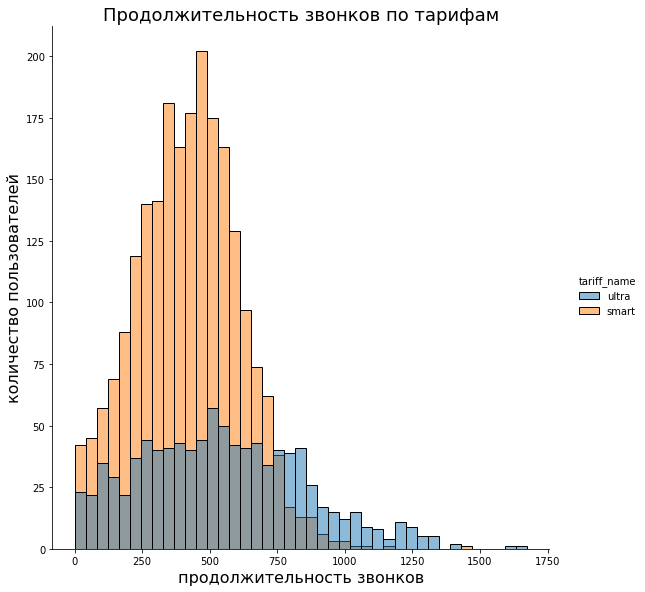

In [61]:
sns.displot(not_null_calls , x = 'sum_call',hue='tariff_name', kind='hist', fill=True, height=8, aspect=1, label='234')
plt.title('Продолжительность звонков по тарифам', fontsize=18)
plt.xlabel('продолжительность звонков', fontsize=16)
plt.ylabel('количество пользователей', fontsize=16)

Как видно из графика, количество пользователей тарифа Смарт намного больше чем Ультра, однако пользователей, разговаривающих больше 750 минут на тарифе Ультра больше. Большинство абонентов тарифа Смарт разговаривают от 200 до 700 минут, и это при лимите в 500 минут, значительное количество польлзователей тарифа превышает лимиты звонков

Проанализируем абонентов с точки зрения количества отправляемых сообщений разных тарифов. Так же уберем абонентов с нулевыми значениями в сообщениях

In [62]:
not_null_sms = full_table[full_table['sms_count']!=0]

Text(7.518576388888896, 0.5, 'количество пользователей')

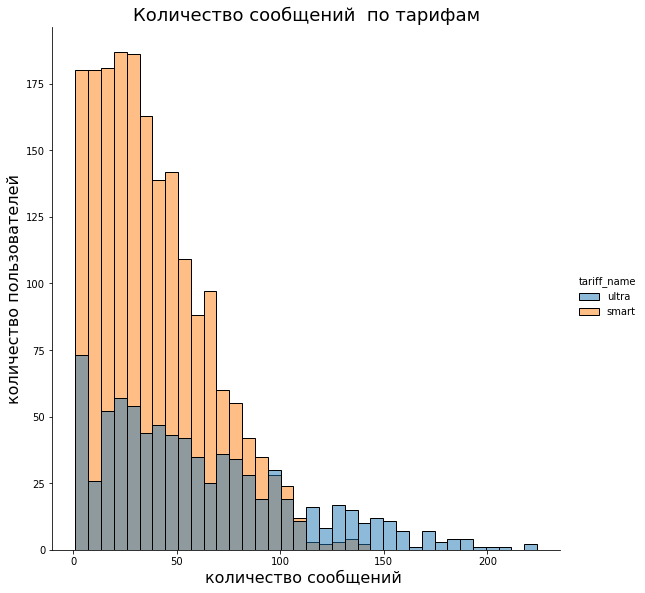

In [63]:
sns.displot(not_null_sms , x = 'sms_count',hue='tariff_name', kind='hist', fill=True, height=8, aspect=1)
plt.title('Количество сообщений  по тарифам', fontsize=18)
plt.xlabel('количество сообщений ', fontsize=16)
plt.ylabel('количество пользователей', fontsize=16)

По графику видим что абоненты тарифа Смарт так же превышают лимиты количества сообщений в 50 штук, а пользователей тарифа Ультра, отправляющих более 120 сообщений больше чем абонентов Смарт тарифа.

Повторим аналогичное исследование по показателю использования интернета.

Text(6.237384259259272, 0.5, 'количество пользователей')

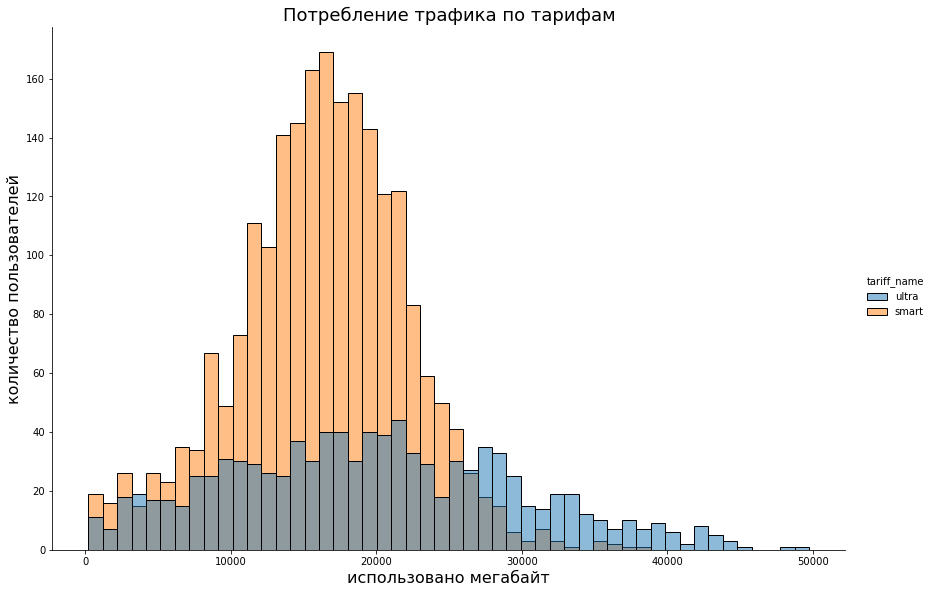

In [64]:
not_null_mb = full_table[full_table['mb_used']!=0]
sns.displot(not_null_mb , x = 'mb_used',hue='tariff_name', kind='hist', fill=True,  height=8, aspect=1.5, bins = 50)
plt.title('Потребление трафика по тарифам', fontsize=18)
plt.xlabel('использовано мегабайт', fontsize=16)
plt.ylabel('количество пользователей', fontsize=16)

Видим, что пользователи тарифа Смарт, пользующиеся интернетом в большинстве своем превышают лимиты тарифа, однако количество абонентов тарифа Ультра достаточно мало - превышающих 30 Гб лимита.



Добавим гистограмму с превышениями потребления интернета в Гб по тарифам, убрав при этом нулевые значения

Text(7.518576388888896, 0.5, 'количество пользователей')

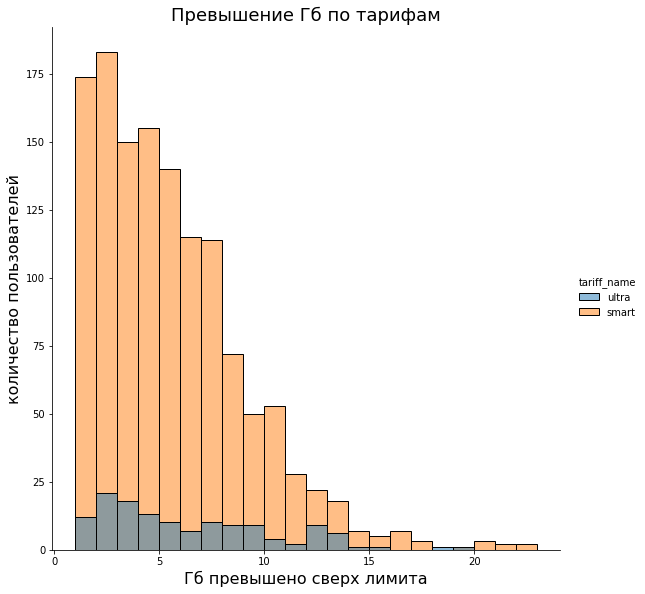

In [65]:
not_null_gb = full_table[full_table['gb_excess']!=0]
sns.displot(not_null_gb, x = 'gb_excess',hue='tariff_name', kind='hist', fill=True,  height=8, aspect=1, bins=22)
plt.title('Превышение Гб по тарифам', fontsize=18)
plt.xlabel('Гб превышено сверх лимита', fontsize=16)
plt.ylabel('количество пользователей', fontsize=16)

Количество пользователей, превышающих лимиты своего тарифа по интернету намного больше на тарифе Смарт

Построим таблицу где отразим среднее, стандартное отклонение и дисперсию для данных по потребленному трафику в Гб и превышению лимитов трафика в Гб  

In [66]:
full_table.pivot_table(index = ['tariff_name'], values = ['gb_excess','used_gb'], aggfunc=['mean','std','var'])

mean               std               var        
            gb_excess used_gb gb_excess used_gb gb_excess used_gb
tariff_name                                                      
smart            2.99   16.33      3.68    5.75     13.56   33.03
ultra            0.80   19.49      2.51    9.85      6.29   97.09

Как видим среднее использование трафика по тарифу Ультра больше (19.49) чем у Смарт - однако абоненты тарифа Смарт превышают свои лимиты в среднем на 3 Гб, в отличии от абонентов Ультра у которых среднее превышение 0.8 Гб.   

Построим гистограмму полной выручки с абонентов по тарифам.

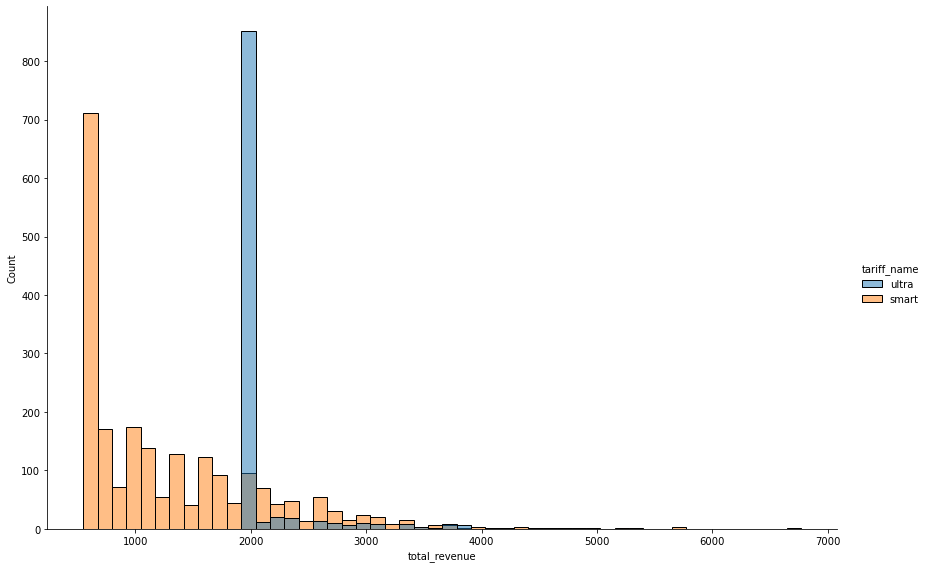

In [67]:

sns.displot(full_table, x = 'total_revenue',hue='tariff_name', kind='hist', fill=True,  height=8, aspect=1.5, bins = 50)

Как видно из гистограмы - количество пользователей, которые укладываются в лимиты по тарифам (550 и 1950 рублей)примерно одинаковое, однако пользователи тарифа Смарт намного больше превышают лимиты своего тарифа - соответственно и больше приносят выручки, с другой стороны количество пользователей тарифа Смарт в выборке более чем в 2 раза больше чем Ультра. Для более точных утверждений необходимо проанализировать показатели средних этих двух выборок.

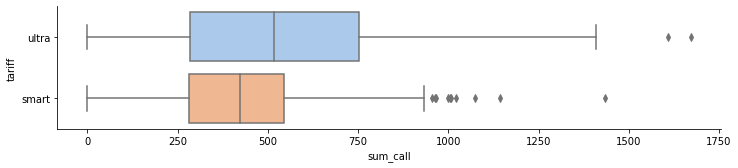

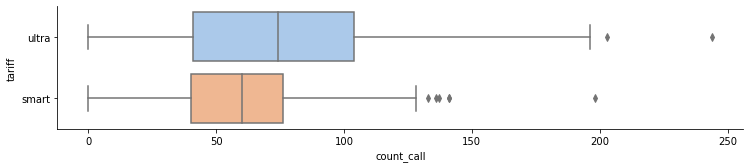

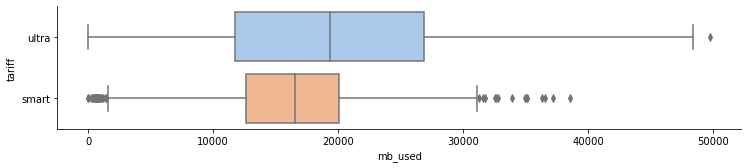

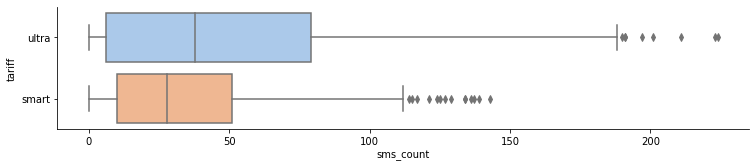

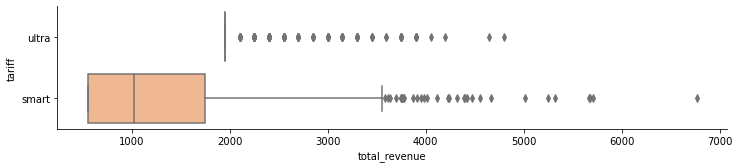

In [68]:
for column in ['sum_call', 'count_call', 'mb_used', 'sms_count',
        'total_revenue']:    
    g = sns.catplot(y='tariff', x=column, kind="box", data=full_table, orient='h', palette = 'pastel')
    g.fig.set_figwidth(12)
    g.fig.set_figheight(2)

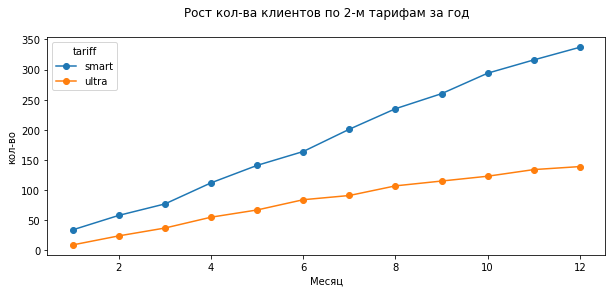

In [69]:
(full_table
 .pivot_table(index='tariff', columns='month', values='user_id', aggfunc='count')
 .T
 .plot(kind='line', figsize=(10,4),  style = 'o-')
)
plt.title('Рост кол-ва клиентов по 2-м тарифам за год'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('кол-во');

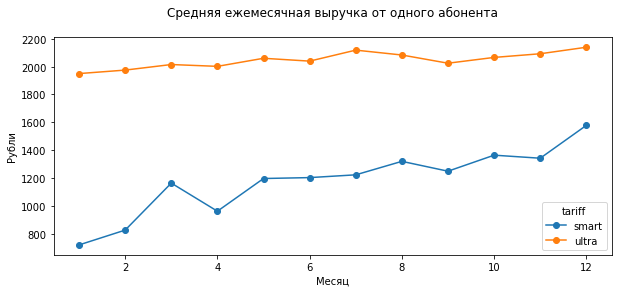

In [70]:
(full_table
 .pivot_table(index='tariff', columns='month', values='total_revenue', aggfunc='mean')
 .T
 .plot(kind='line', figsize=(10,4),  style = 'o-')
)
plt.title('Средняя ежемесячная выручка от одного абонента'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('Рубли');

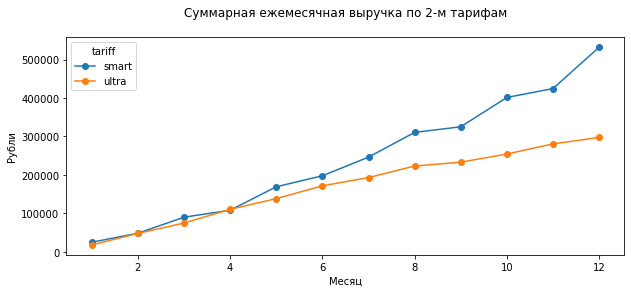

In [71]:
(full_table
 .pivot_table(index='tariff', columns='month', values='total_revenue', aggfunc='sum')
 .T
 .plot(kind='line', figsize=(10,4),  style = 'o-')
)
plt.title('Суммарная ежемесячная выручка по 2-м тарифам'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('Рубли');

### Средняя, дисперсия и стандартное отклонение

Посчитаем среднее количество, дисперсию и стандартное отклонение с помощью сводной таблицы по двум тарифам. 

In [72]:
full_table.pivot_table(index = ['tariff_name'], values = ['mb_used','sum_call', 'sms_count','total_revenue'], aggfunc=['mean','std','var'])


mean                                       std            \
             mb_used sms_count sum_call total_revenue  mb_used sms_count   
tariff_name                                                                
smart       16208.39     33.38   417.93       1289.97  5870.48     28.23   
ultra       19468.81     49.36   526.62       2070.15 10087.17     47.80   

                                            var                      \
            sum_call total_revenue      mb_used sms_count  sum_call   
tariff_name                                                           
smart         190.31        818.40  34462496.46    796.81  36219.32   
ultra         317.61        376.19 101751013.78   2285.27 100873.63   

                           
            total_revenue  
tariff_name                
smart           669785.71  
ultra           141516.75

Абоненты тарифа Ультра в среднем совершают больше звонков, отправляют сообщений и больше пользуются интернетом, чем абоненты Смарта. Однако стандартное отклонение по всем параметрам у абонентов Ультра больше чем у пользователей Смарта - склоны распределения  являются более пологими и длиннее «хвосты» длиннее. Так же видим - что хоть абонентов Ультра в 2 раза меньше, а абоненты Смарт превышают лимиты намного чаще - средняя выручка по абонентам Ультра больше и составляет 2059.86 против 1230.44

Опишем типы распределения данных  

Гистограмма продолжительности звонков по тарифу Смарт имеет вид нормального распределения, достаточно симметричная форма с пиком в центре интервала в отличии от тарифа Ультра, гистограмма которого имеет вид плато, в котором  средние значения нескольких распределений отличаются незначительно. Имеется несколько выбросов в данных

Гистограмма количества сообщений по обоим тарифам имеет форму усеченного распределения с обрывом слева, среднее арифметическое гистограммы локализовано справа от центра размаха

Гистограмма потребления трафика по тарифам имеет вид нормального распределения, у абонентов тарифа Смарт чертковыраженный пик в центре распределения, поэтому стардартное отклонение у пользователей Смарт меньше нежели у абонентов Ультра, у которых нет ярко выраженного пика и по этому стандартное отклонение больше

## Проверка гипотезы отличий средней выручки

Проверка гипотезы, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Нулевой гипотезой возьмем гипотезу о том, что средние наших выборок равны. Альтернативной гипотезой будет наша гипотеза "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается".

Используем метод scipy.stats.ttest_ind (array1, array2, equal_var = False). Который используется для проверки гипотез равенства средних двух  совокупностей по взятым из них выборкам.
 False, потому что дисперсии наших выборок отличаются.
Критический уровень значимости возьмем 0.05

In [73]:
alpha = 0.05

In [74]:
mean_smart = smart_users['total_revenue']
mean_ultra = ultra_users['total_revenue']
print ('Среднее значение выручки абонентов Смарт:',mean_smart.mean() )
print  ('Среднее значение выручки абонентов Ультра:',mean_ultra.mean())

result = st.ttest_ind(mean_smart, mean_ultra,equal_var = False)
print ('p-значение:', result.pvalue)

Среднее значение выручки абонентов Смарт: 1289.9735307312696
Среднее значение выручки абонентов Ультра: 2070.1522842639592
p-значение: 4.2606313931076085e-250


In [75]:
if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


Гипотезу о равенстве средних значений тарифов выборок отклоняем - так как значение pvalue меньше критического уровня значимости. Вероятность случайного совпадения средних выборок тарифов очень маленькая. Среднее значение выручки абонентов Ультра больше среднего выручки абонентов Смарт.


## Проверка гипотезы что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Нулевой гипотезой возьмем гипотезу о том, что средния выручка абонентов из Москвы равна средней выручке всех остальных абоненов выборки . Альтернативной гипотезой будет наша гипотеза о неравенстве средних выручек.

In [76]:
moscow_table = full_table[full_table['city'] == 'Москва']

In [77]:
not_moscow_table = full_table[full_table['city'] != 'Москва']

In [78]:
mean_moscow = moscow_table['total_revenue']
mean_not_moscow = not_moscow_table['total_revenue']

print ('Среднее значение выручки абонентов из Москвы:',mean_moscow.mean() )
print  ('Среднее значение выручки не Московских абонентов :',mean_not_moscow.mean())

Среднее значение выручки абонентов из Москвы: 1546.7135842880523
Среднее значение выручки не Московских абонентов : 1524.9362274298885


In [79]:
result = st.ttest_ind(mean_moscow, mean_not_moscow,equal_var = False)
print ('p-значение:', result.pvalue)
if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


Так как pvalue больше критического уровня значимости мы не можем отвергнуть нулевую гипотезу о равенстве средних выручек абонентов из Москвы и всех остальных.

## Общие выводы анализа перспективного тарифа для телеком компании

Мы обработали все датасеты, сделали сводные таблицы по месяцам и каждому пользователю, объединили их в один датасет, добавили в него информацию о превышениях по тарифам по каждой услуге и по каждому пользователю, а так же посчитали итоговую выручку по пользователям. Проанализировали данные и получили следующие результаты:
* Пользователи тарифа Ультра не превышают лимитов по звонкам и смс - однако превышают по мегабайтам
* Много абонентов тарифа Смарт превышают лимиты по всем услугам - смс, звонкам и интернету
* Среднее количество мегабайт потребления по обоим тарифам примерно одинаковое 
* Общая выручка абонентов тарифа Смарт по датасету больше на треть чем выручка по абонентам Ультра
* Но средняя выручка по пользователям тарифа Ультра выше чем Смарт, все из-за высокой абонентской платы, которая выше почти в 4 раза, хоть абоненты тарифа и не превышают лимиты по смс и звонкам
* Гипотезу о том, что средние выручки по тарифам равны мы отклонили из-за низкого pvalue 
* Гипотезу о равенстве средних выручек пользователей тарифа из Москвы и остальных абонентов мы не отклоняли, 45% это слишком большая вероятность чтобы сделать вывод о значимом различии средних выручек 
* Доля пользователей тарифа Смарт составляет 70%
* Пользователи тарифа Смарт приносят 58%  от всего дохода компании, несмотря на то, что абонентская плата у них дешевле, объем включенных в тариф лимитов меньше, чем в тарифе Ультра. Абоненты Смарт чаще превышают лимиты по интернету ( в среднем на 3 Гб) - основная доля дохода от тарифа - это превышения по интернету
* Абоненты тарифа Ультра не превышают установленных лимитов по смс и включенным минутам разговоров, но так же превышают установленные лимиты по интернету (в среднем 0.8 Гб) 
* Абоненты тарифа Ультра приносят 42% выручки в основном за счет более высокой абонентской платы тарифа (в 3,5) раза больше чем Смарт.
* Годовая выручка по абонентам Смарт составляет 2.8 млн. руб.
* Годовая выручка по абонентам Ультра составляет 2.0 млн. руб.
* Тариф Смарт выгоднее для компании, он пользуется большей популярностью у абонентов, по нему больше доходы.